In [2]:
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import os
import cv2
import numpy as np
import keras 
from keras import applications
from SafeCV import *



model = keras.applications.vgg16.VGG16()
imagenet_class = "920"
image = cv2.imread("TEST_IMAGE.JPEG")
image = cv2.resize(image, (224,224))

params_for_run = MCTS_Parameters(image, int(imagenet_class), model)
params_for_run.verbose = True
params_for_run.simulations_cutoff = 35
params_for_run.backtracking_constant = 50

best_image, sev, prob, statistics = MCTS(params_for_run)


Exploring new keypoints on a new layer: 1 on node: 178
Starting DFMCS. Cuttoff: -1
Current Probability: 0.226967 Current Class: 920 Manipulations: 7300  

Adversarial Example Found
Current Probability: 0.219374 Current Class: 611 Manipulations: 7400 Backtracking
Backtracking Step L_0: 7349 Probability: 0.23831 Class: 920, progress: 7250/7400
 Done backtracking
Back propogating and restarting search. Current Severity: 7449
Best severity: 7449

Exploring new keypoints on an existing layer: 1 on node: 4
Starting DFMCS. Cuttoff: 7449
Current Probability: 0.333759 Current Class: 920 Manipulations: 6600  

Adversarial Example Found
Current Probability: 0.318095 Current Class: 626 Manipulations: 6700  Backtracking
Backtracking Step L_0: 6547 Probability: 0.334755 Class: 920, progress: 6550/6700
 Done backtracking
Back propogating and restarting search. Current Severity: 6647
Best severity: 6647

Exploring new keypoints on an existing layer: 1 on node: 39
Starting DFMCS. Cuttoff: 6647
Current 

Current Probability: 0.528445 Current Class: 920 Manipulations: 3400  Back propogating and restarting search. Current Severity: -1
Best severity: 2600

Exploring new keypoints on an existing layer: 1 on node: 181
Starting DFMCS. Cuttoff: 2600
Current Probability: 0.492596 Current Class: 920 Manipulations: 3400  Back propogating and restarting search. Current Severity: -1
Best severity: 2600

manipulating and continuing the search: 135
Exploring new keypoints on an existing layer: 2 on node: 170
Starting DFMCS. Cuttoff: 2600
Current Probability: 0.514248 Current Class: 920 Manipulations: 3400  Back propogating and restarting search. Current Severity: -1
Best severity: 2600

Exploring new keypoints on an existing layer: 1 on node: 189
Starting DFMCS. Cuttoff: 2600
Current Probability: 0.655862 Current Class: 920 Manipulations: 3400  Back propogating and restarting search. Current Severity: -1
Best severity: 2600

Exploring new keypoints on an existing layer: 1 on node: 48
Starting DFMCS.

BEST ADVERSARIAL EXAMPLE:


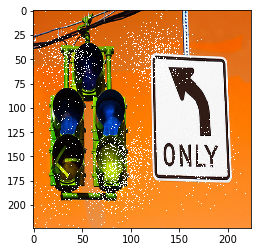

True class: 920; Predicted as: 772 with confidence: 0.356378; After 2600 manipulations
MCTS Run analysis:


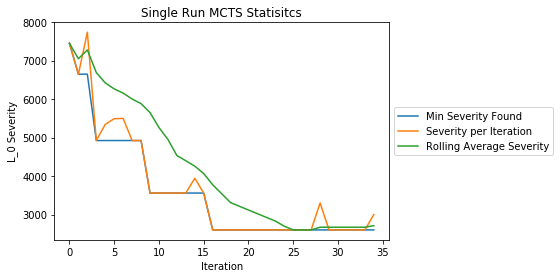

In [4]:
import matplotlib.pyplot as plt
print("BEST ADVERSARIAL EXAMPLE:")
plt.imshow(best_image)
plt.show()
prob = model.predict(best_image.reshape(1,224,224,3))
new_class = np.argmax(prob[0])
new_prob = prob[0][np.argmax(prob)]
print("True class: %s; Predicted as: %s with confidence: %s; After %s manipulations"%(imagenet_class, new_class, new_prob, sev ))
plt.clf()
print("MCTS Run analysis:")
a, = plt.plot(statistics[0], label="Min Severity Found")
b, = plt.plot(statistics[1], label="Severity per Iteration")
c, = plt.plot(statistics[2], label="Rolling Average Severity")
plt.legend(handles=[a,b,c], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Single Run MCTS Statisitcs")
plt.xlabel("Iteration")
plt.ylabel("L_0 Severity")
plt.show()